# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Suci Wulan Dari]
- **Email:** [suciwd3@gmail.com]
- **ID Dicoding:** [suciwd3]

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wragling

### - Gathering Data

**1. Orders**

In [63]:
# Load dataset
orders = pd.read_csv('data/orders_dataset.csv')

# Tampilkan beberapa baris pertama data
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**

**1. Rangkaian Waktu Pesanan:**
Data ini menyediakan waktu untuk beberapa tahapan proses pesanan, dari *order_purchase_timestamp (waktu pesanan dibuat)*, *order_approved_at (waktu pesanan disetujui)*, *order_delivered_carrier_date (waktu pesanan dikirim oleh kurir)*, *order_delivered_customer_date (waktu pesanan diterima pelanggan)*, hingga *order_estimated_delivery_date (perkiraan waktu pengiriman)*. 

**2. Status Pesanan:**
Kolom *order_status* menunjukkan status akhir dari setiap pesanan, di mana semua data dalam sampel ini memiliki status “delivered”. Ini menunjukkan bahwa data ini mencakup hanya pesanan yang berhasil diselesaikan.

**3. Estimasi Waktu Pengiriman vs. Waktu Pengiriman Sebenarnya:**
Kolom *order_estimated_delivery_date* dan *order_delivered_customer_date* memungkinkan perbandingan antara estimasi pengiriman dan pengiriman aktual.

**4. Metrik Pelanggan Berulang:**
Dengan *customer_id*, kita dapat mengidentifikasi apakah ada pelanggan yang melakukan beberapa pesanan. Analisis ini bisa membantu menemukan pelanggan setia atau menganalisis pola pesanan pelanggan.

**2. Order Items**

In [64]:
# Load dataset
order_items = pd.read_csv('data/order_items_dataset.csv')

# Tampilkan beberapa baris pertama data
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


**Insight:**

**1. Harga produk dan biaya pengiriman:**
Data ini mencakup informasi mengenai price (harga produk) dan freight_value (biaya pengiriman) untuk setiap item pesanan.

**2. Batas Waktu Pengiriman Kurir (Shipping Limit Date):**
Kolom shipping_limit_date menunjukkan batas waktu bagi kurir untuk mengirimkan pesanan dari seller (penjual).

**3. Variasi Harga Produk:**
Melalui kolom price, kita bisa melihat variasi harga dari berbagai produk yang dibeli. Dalam sampel ini, harga produk bervariasi dari 12.99 hingga 239.90.

**4. Freight Value Terhadap Produk dengan Nilai Rendah:**
Dari data sampel, terlihat bahwa ada produk dengan harga rendah yang masih memiliki biaya pengiriman cukup besar, seperti pada item dengan price 12.99 dan freight_value 12.79.

**5. Identifikasi Produk dan Penjual (Product ID dan Seller ID):**
Kolom product_id dan seller_id memungkinkan kita untuk mengidentifikasi produk dan penjual spesifik untuk setiap pesanan

**6. Jumlah Item per order:**
Kolom order_item_id memberikan informasi jumlah item dalam setiap order_id.

**3. Order Payments**

In [65]:
# Load dataset
order_payments = pd.read_csv('data/order_payments_dataset.csv')

# Tampilkan beberapa baris pertama data
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**

**1. Metode Pembayaran Dominan:**
Data ini mencakup informasi mengenai price (harga produk) dan freight_value Kolom payment_type menunjukkan jenis pembayaran yang digunakan, dan di sampel ini hanya terdapat metode pembayaran credit_card.

**2. Pembayaran Angsuran:**
Kolom payment_installments menunjukkan jumlah cicilan yang dipilih pelanggan untuk setiap transaksi. Seperti, beberapa transaksi menggunakan angsuran hingga 8 kali, sedangkan lainnya hanya sekali bayar.

**3. Nilai Pembayaran (Payment Value):**
Kolom payment_value menunjukkan jumlah yang dibayarkan untuk setiap transaksi. Dari contoh ini, jumlah pembayaran berkisar dari sekitar 24 dollar hingga 128 dollar.

**4. Pembayaran Bertahap pada Transaksi yang Sama:**
Kolom payment_sequential menunjukkan urutan pembayaran untuk suatu pesanan, yang dalam data ini semuanya bernilai 1, menunjukkan bahwa setiap transaksi memiliki satu pembayaran.

**4. Order Reviews**

In [66]:
# Load dataset
order_reviews = pd.read_csv('data/order_reviews_dataset.csv')

# Tampilkan beberapa baris pertama data
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**
**1. Skor Ulasan (Review Score):**
Kolom *review_score* menunjukkan skor ulasan yang diberikan oleh pelanggan, berkisar dari 1 hingga 5 (dalam contoh ini, semua memiliki nilai 4 atau 5).

**2. Komentar Ulasan:**
Kolom *review_comment_title* dan *review_comment_message* menyimpan judul dan isi komentar ulasan. Dari sampel ini, beberapa ulasan kosong, sedangkan yang lainnya berisi pesan positif.

**3. Waktu Pembuatan dan Tanggapan Ulasan:**
Kolom review_creation_date dan review_answer_timestamp menunjukkan kapan ulasan dibuat dan kapan perusahaan menanggapi ulasan tersebut.

**4. Ulasan yang Tidak Mengandung Komentar:**
Banyak ulasan dalam sampel ini yang tidak memiliki komentar (judul dan pesan berisi NaN).


**5. Products**

In [67]:
# Load dataset
products= pd.read_csv('data/products_dataset.csv')

# Tampilkan beberapa baris pertama data
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**

**1. Kategori Produk:**
Kolom product_category_name menunjukkan kategori produk, dan di sampel ini terdapat kategori seperti perfumaria, artes, esporte_lazer, bebes, dan utilidades_domesticas.

**2. Panjang Deskripsi dan Nama Produk:**
Kolom product_name_lenght dan product_description_lenght menunjukkan panjang karakter dalam nama produk dan deskripsi produk.

**3. Jumlah Foto Produk:**
Kolom product_photos_qty menunjukkan jumlah foto yang disediakan untuk setiap produk. Di sampel ini, beberapa produk memiliki satu foto, sementara satu produk memiliki empat foto.

**4. Berat dan Dimensi Produk:**
Kolom product_weight_g, product_length_cm, product_height_cm, dan product_width_cm memberikan informasi terkait berat dan dimensi produk.



**6. Product category**

In [68]:
# Load dataset
product_category = pd.read_csv('data/product_category_name_translation.csv')

# Tampilkan beberapa baris pertama data
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
**1. Ketersediaan Kategori Produk dalam Bahasa Inggris:**
Kolom product_category_name menunjukkan kategori produk dalam bahasa asli (portugis), sementara kolom product_category_name_english menyajikan terjemahan kategori tersebut ke dalam bahasa Inggris.

**2. Kemudahan Pencarian Produk:**
Dengan adanya kategori produk dalam dua bahasa (asli dan terjemahan), produk lebih mudah ditemukan oleh konsumen yang berbicara bahasa Portugis dan juga mereka yang berbicara bahasa Inggris.

**3. Peluang untuk Ekspansi Pasar Global:**
Terjemahan kategori produk mencerminkan kesiapan platform e-commerce untuk menjangkau pasar internasional.

**7. Customers**

In [69]:
# Load dataset
customers = pd.read_csv('data/customers_dataset.csv')

# Tampilkan beberapa baris pertama data
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**

**1. Informasi Identitas Pelanggan:**
Kolom customer_id dan customer_unique_id menunjukkan dua jenis identifikasi pelanggan yang berbeda. customer_id bisa jadi ID yang digunakan dalam sistem internal untuk melacak transaksi atau akun pelanggan, sementara customer_unique_id mungkin lebih global atau permanen, digunakan untuk identifikasi pelanggan di berbagai platform atau aplikasi.

**2. Distribusi Pelanggan Berdasarkan Lokasi:**
Kolom customer_zip_code_prefix, customer_city, dan customer_state memberikan informasi mengenai lokasi geografis pelanggan.

**3. Pelayanan Berdasarkan Lokasi Geografis:**
Data kode pos (customer_zip_code_prefix) memberikan petunjuk lebih lanjut tentang layanan logistik dan pengiriman yang dapat disesuaikan dengan lokasi pelanggan.

**4. Potensi Analisis Clustering Berdasarkan Lokasi:**
Dengan data yang ada pada kolom customer_city dan customer_state, perusahaan bisa melakukan analisis klaster (clustering) untuk mengelompokkan pelanggan berdasarkan lokasi geografis mereka.

**8. Sellers**

In [70]:
# Load dataset
sellers = pd.read_csv('data/sellers_dataset.csv')

# Tampilkan beberapa baris pertama data
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**

**1. Lokasi Geografis Penjual:**
Kolom seller_zip_code_prefix, seller_city, dan seller_state menunjukkan data mengenai lokasi penjual, termasuk kode pos, kota, dan negara bagian mereka.

**2. Konsentrasi Penjual di Wilayah Tertentu:**
Melihat kota mana yang memiliki konsentrasi penjual yang tinggi dan bandingkan dengan kota lainnya.

**3. Pelayanan Berdasarkan Lokasi Geografis:**
Data kode pos (customer_zip_code_prefix) memberikan petunjuk lebih lanjut tentang layanan logistik dan pengiriman yang dapat disesuaikan dengan lokasi pelanggan.

**4. Peluang untuk Kolaborasi dengan Pusat Distribusi atau Gudang:**
Dengan mengetahui lokasi geografis penjual, perusahaan dapat mempertimbangkan untuk membuka pusat distribusi atau gudang di kota atau area yang memiliki banyak penjual. Ini dapat meningkatkan efisiensi dalam hal pengiriman dan mengurangi biaya pengiriman untuk pelanggan.

**5. Pengelompokan Penjual Berdasarkan Kota:**
Menyusun penjual berdasarkan kota dan negara bagian mereka dapat membantu dalam mengidentifikasi area dengan lebih banyak aktivitas penjualan.

**6. Peluang Pemasaran Berdasarkan Lokasi Penjual:**
Data lokasi penjual ini dapat digunakan untuk merancang kampanye pemasaran yang lebih terfokus berdasarkan kota atau negara bagian penjual.


### - Assessing Data

**1. Menilai Data Orders**

In [71]:
orders.info()
orders.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [72]:
print("Jumlah duplikasi: ", orders.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**

**1. Missing Values:**
Terdapat beberapa kolom yang memiliki nilai missing, antara lain:
- order_approved_at, menunjukkan bahwa terdapat sejumlah pesana yang mungkin belum disetujui secara resmi, mungkin saja transaksi dibatalkan.
- order_delivered_carrier_date, missing values dapat mengindikasikan bahwa beberapa pesanan mungkin tidak pernah dikirim. 
- order_delivered_customer_date, dapat mengindikasikan bahwa beberapa pesanan belum sampai ke pelanggan atau mungkin tidak pernah dikirim. Ini bisa menjadi indikator dari masalah operasional seperti kendala logistik atau pengiriman yang terhenti.

**2. Tipe Data Tidak Tepat pada Kolom Waktu:**
Semua kolom tanggal dan waktu (order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date) saat ini disimpan dalam bentuk string atau object dan perlu dikonversi ke tipe datetime untuk dapat di analisis.

**3. Data Duplikasi:**
Pemeriksaan menunjukkan bahwa tidak ada baris duplikat dalam tabel ini (Jumlah duplikasi: 0).

**2. Menilai Data Order Items**

In [73]:
order_items.info()
order_items.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [74]:
print("Jumlah duplikasi: ", order_items.duplicated().sum())
order_items.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**

**1. Missing Values:**
Tidak ada data yang hilang, semua kolom dalam dataset ini memiliki nilai yang lengkap (non-null).

**2. Tipe data yang tidak tepat:**
Kolom shipping_limit_date berisi tanggal batas waktu pengiriman dan masih dalam bentuk string (object), yang memerlukan konversi ke tipe data datetime.

**3. Data Duplikasi:**
Tidak terdapat data duplikasi. Pemeriksaan duplikasi menunjukkan bahwa tidak ada baris yang terduplikasi dalam dataset ini (Jumlah duplikasi: 0).

**4. Distribusi Harga (price):**
- Rata-rata harga produk sekitar 120,65, dengan standar deviasi 183,63.
- Nilai harga berkisar dari 0,85 (minimum) hingga 6.735 (maksimum).

Kisaran harga yang lebar mengindikasikan variasi besar dalam jenis produk, dari barang murah hingga premium.

**5. Distribusi Pengiriman (freight_value):**
- Rata-rata nilai pengiriman sekitar 19,99, dengan standar deviasi 15,81.
- Biaya pengiriman minimum adalah 0, dan maksimum mencapai 409,68.
  
Akan dilakukan pemeriksaan selanjutnya untuk:
- Biaya pengiriman nol dapat menunjukkan promosi pengiriman gratis atau kesalahan data.


**3. Menilai Data Order Payments**

In [75]:
order_payments.info()
order_payments.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [76]:
print("Jumlah duplikasi: ", order_payments.duplicated().sum())
order_payments.describe()

Jumlah duplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


**Insight:**

**1. Missing Values:**
Tidak ada data yang hilang, semua kolom dalam dataset ini memiliki nilai yang lengkap (non-null).

**2. Tipe data yang tidak tepat:**
Semua kolom sudah memiliki tipe data yang sesuai untuk analisis.

**3. Data Duplikasi:**
Tidak terdapat data duplikasi. Pemeriksaan duplikasi menunjukkan bahwa tidak ada baris yang terduplikasi dalam dataset ini (Jumlah duplikasi: 0).

**4. Distribusi payment_sequential:**
Kolom ini menunjukkan nomor urutan pembayaran untuk setiap pesanan. Semua pesanan memiliki nilai minimum 1, mencapai hingga urutan ke-29.Nilai maksimum yang mencapai 29 mengindikasikan adanya pesanan yang mungkin mengalami beberapa pembayaran

**5. Distribusi payment_installments:**
Nilai cicilan berkisar dari 0 hingga 24 kali, dengan rata-rata cicilan sekitar 2,85. Cicilan 0 mungkin menunjukkan pembayaran penuh di muka, sedangkan cicilan tertinggi mencapai 24, menunjukkan opsi pembayaran panjang untuk barang-barang mahal.

**6. Distribusi payment_value:**
Nilai pembayaran per transaksi sangat bervariasi, dari 0 hingga 13.664,08 dengan rata-rata sekitar 154,10 dan standar deviasi 217,49. Pembayaran minimum 0 mungkin mencakup kasus-kasus pembayaran promosi, kesalahan transaksi, atau pembayaran dengan metode alternatif yang tidak tercatat di sini. Untuk itu akan diperiksa kembali di tahap berikutnya. Sedangkan, nilai maksimum yang sangat tinggi (13.664,08) menunjukkan adanya produk dengan harga tinggi.

**4. Order Reviews**

In [77]:
order_reviews.info()
order_reviews.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [78]:
print("Jumlah duplikasi: ", order_reviews.duplicated().sum())
order_reviews.describe()

Jumlah duplikasi:  0


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight:**

**1. Missing Values:**
Terdapat dua kolom yang memiliki jumlah missing values yang cukup besar:
- review_comment_title memiliki 87,656 nilai kosong dari total 99,224 data.
- review_comment_message memiliki 58,247 nilai kosong dari total 99,224 data.

Sebagian besar ulasan tidak menyertakan comment title atau comment message. Hal ini menunjukkan bahwa banyak pelanggan yang hanya memberikan review score tanpa komentar tambahan.

**2. Tipe data yang tidak tepat:**
Kolom tanggal, seperti review_creation_date dan review_answer_timestamp, bertipe object tetapi dapat diubah ke tipe datetime 

**3. Data Duplikasi:**
Tidak terdapat data duplikasi. Pemeriksaan duplikasi menunjukkan bahwa tidak ada baris yang terduplikasi dalam dataset ini (Jumlah duplikasi: 0).

**5. Menilai data Products**

In [79]:
products.info()
products.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [80]:
print("Jumlah duplikasi: ", products.duplicated().sum())
products.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**

**1. Missing Values:**
Terdapat 5 kolom yang memiliki jumlah missing values yaitu:
- product_category_name, product_name_lenght, product_description_lenght sebanyak 610.
- product_weight_g, product_length_cm, product_height_cm, dan product_width_cm masing-masing memiliki 2 nilai kosong.
Kolom terkait panjang nama produk, deskripsi, dan jumlah foto berpotensi memengaruhi kelengkapan informasi produk. 
Nilai kosong dalam kategori produk atau atribut dimensi fisik bisa mempersulit analisis yang memerlukan kategori produk atau pengukuran fisik. 
Akan tetapi, dalam analisis ini tidak membutuhkan atribut tersebut untuk itu tidak apa apa dibiarkan kosong.

**2. Tipe data yang tidak tepat:**
Semua kolom sudah memiliki tipe data yang sesuai untuk analisis.

**3. Data Duplikasi:**
Tidak terdapat data duplikasi. Pemeriksaan duplikasi menunjukkan bahwa tidak ada baris yang terduplikasi dalam dataset ini (Jumlah duplikasi: 0).

**6. Product Category**

In [81]:
product_category.info()
product_category.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


product_category_name            0
product_category_name_english    0
dtype: int64

In [82]:
print("Jumlah duplikasi: ", product_category.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**

**1. Missing Values:**
Tidak ada data yang hilang, semua kolom dalam dataset ini memiliki nilai yang lengkap (non-null).

**2. Tipe data yang tidak tepat:**
Semua kolom sudah memiliki tipe data yang sesuai untuk analisis.

**3. Data Duplikasi:**
Tidak terdapat data duplikasi. Pemeriksaan duplikasi menunjukkan bahwa tidak ada baris yang terduplikasi dalam dataset ini (Jumlah duplikasi: 0).

**7. Customers**

In [83]:
customers.info()
customers.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [84]:
print("Jumlah duplikasi: ", customers.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**

**1. Missing Values:**
Tidak ada data yang hilang, semua kolom dalam dataset ini memiliki nilai yang lengkap (non-null).

**2. Tipe data yang tidak tepat:**
Semua kolom sudah memiliki tipe data yang sesuai untuk analisis.

**3. Data Duplikasi:**
Tidak terdapat data duplikasi. Pemeriksaan duplikasi menunjukkan bahwa tidak ada baris yang terduplikasi dalam dataset ini (Jumlah duplikasi: 0).

**8. Sellers**

In [85]:
sellers.info()
sellers.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [86]:
print("Jumlah duplikasi: ", sellers.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**

**1. Missing Values:**
Tidak ada data yang hilang, semua kolom dalam dataset ini memiliki nilai yang lengkap (non-null).

**2. Tipe data yang tidak tepat:**
Semua kolom sudah memiliki tipe data yang sesuai untuk analisis.

**3. Data Duplikasi:**
Tidak terdapat data duplikasi. Pemeriksaan duplikasi menunjukkan bahwa tidak ada baris yang terduplikasi dalam dataset ini (Jumlah duplikasi: 0).

### - Cleaning Data

**Mengubah Tipe Data pada Order**

In [87]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
 
for column in datetime_columns:
  orders[column] = pd.to_datetime(orders[column])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Mengubah Tipe Data pada Order Items**

In [88]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'], errors='coerce')
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Mengubah Tipe Data pada Order Reviews**

In [89]:
datetime_columns = ["review_creation_date","review_answer_timestamp"]
 
for column in datetime_columns:
  order_reviews[column] = pd.to_datetime(order_reviews[column])

order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Memeriksa Distribusi Nilai Pengiriman pada Order Items**

In [90]:
order_items[order_items.freight_value == order_items.freight_value.min()]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
114,00404fa7a687c8c44ca69d42695aae73,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-15 04:31:26,99.9,0.0
258,00a870c6c06346e85335524935c600c0,1,aca2eb7d00ea1a7b8ebd4e68314663af,955fee9216a65b617aa5c0531780ce60,2018-05-14 00:14:29,69.9,0.0
483,011c899816ea29773525bd3322dbb6aa,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-07 05:30:45,99.9,0.0
508,012b3f6ab7776a8ab3443a4ad7bef2e6,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
509,012b3f6ab7776a8ab3443a4ad7bef2e6,2,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-05-09 21:30:50,53.9,0.0
...,...,...,...,...,...,...,...
111094,fc698f330ec7fb74859071cc6cb29772,1,422879e10f46682990de24d770e7f83d,1f50f920176fa81dab994f9023523100,2018-04-25 02:31:57,53.9,0.0
111497,fd4907109f6bac23f07064af84bec02d,1,7a10781637204d8d10485c71a6108a2e,4869f7a5dfa277a7dca6462dcf3b52b2,2018-04-30 11:31:32,219.0,0.0
111649,fd95e4b85ebbb81853d4a6be3d61432b,1,53b36df67ebb7c41585e8d54d6772e08,4869f7a5dfa277a7dca6462dcf3b52b2,2018-05-04 11:10:31,106.9,0.0
112182,fee19a0dc7358b6962a611cecf6a37b4,1,f1c7f353075ce59d8a6f3cf58f419c9c,37be5a7c751166fbc5f8ccba4119e043,2017-09-07 22:06:31,195.0,0.0


Terdapat 383 data yang memiliki freight_value 0. Dilihat dari banyaknya data, sepertinya memang pelanggan menggunakan voucher. 

**Memeriksa Distribusi payment_value pada Order Payments**

In [91]:
order_payments[order_payments.payment_value == order_payments.payment_value.min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


- Terdapat 9 transaksi memiliki nilai payment_value sebesar 0.0, yang dapat disebabkan oleh penggunaan voucher atau karena jenis pembayaran yang not_defined. Hal ini menunjukkan bahwa transaksi tersebut mungkin dibiayai sepenuhnya oleh kupon atau diskon tanpa perlu ada pembayaran tambahan dari pelanggan.
- Transaksi dengan payment_value nol di berbagai tipe pembayaran, terutama not_defined, mengindikasikan kemungkinan adanya kesalahan data atau transaksi yang tidak sepenuhnya teridentifikasi. Perlu ada pemeriksaan lebih lanjut dan validasi sistem untuk memastikan bahwa data pembayaran sesuai dengan aturan transaksi.

## Exploratory Data Analysis (EDA)

**Mengeksplorasi Data Orders**

1. Distribusi Status Pemesanan

In [92]:
orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

**Insight**
- Tingkat Keberhasilan Pengiriman yang Tinggi

Sebagian besar pesanan (96,478 atau sekitar 97%) telah berhasil dikirimkan dengan status "delivered". Ini menunjukkan bahwa sistem pengiriman dan pemenuhan pesanan memiliki kinerja yang baik, dengan tingkat keberhasilan pengiriman yang sangat tinggi.

- Tingkat Pembatalan Rendah

Jumlah pesanan yang dibatalkan (625 atau sekitar 0,6%) relatif kecil dibandingkan dengan total pesanan yang dikirimkan. Ini menunjukkan bahwa pelanggan umumnya puas dengan produk dan layanan, sehingga tingkat pembatalannya rendah.

- Produk Tidak Tersedia
   
Ada 609 pesanan yang berstatus "unavailable", menunjukkan bahwa beberapa pelanggan memesan produk yang stoknya mungkin habis atau tidak tersedia. Ini bisa menjadi area untuk evaluasi stok atau koordinasi yang lebih baik dengan pemasok untuk mengurangi kejadian ini.

2. Waktu Pengiriman

In [93]:
orders[['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']].describe()

,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
count,99441,96476,99441
mean,2017-12-31 08:43:12.776581120,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,2016-09-04 21:15:19,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,2017-09-12 14:46:19,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,2018-01-18 23:04:36,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,2018-05-04 15:42:16,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,2018-10-17 17:30:18,2018-10-17 13:22:46,2018-11-12 00:00:00


**Insight:**

- Rata-rata Waktu Pengiriman Aktual vs Estimasi

Rata-rata waktu pengiriman aktual (2018-01-14) lebih cepat dari estimasi pengiriman (2018-01-24), menunjukkan bahwa pengiriman sering kali tiba lebih cepat dari perkiraan. Hal ini sangat bagus yang akan berdampak pada peningkatan kepuasan pelanggan karena pesanan tiba lebih cepat dari yang diharapkan.

- Perbandingan Waktu Pengiriman Rata-rata dan Median
  
Median waktu pengiriman aktual (2018-02-02) dan estimasi (2018-02-15) menunjukkan bahwa separuh pesanan diterima pelanggan dalam waktu dua minggu setelah pemesanan, lebih cepat dari perkiraan. Ini menunjukkan keandalan dalam kecepatan pengiriman yang konsisten di lebih dari setengah pesanan.

- Tren Musiman dalam Pembelian dan Pengiriman

Kuartil menunjukkan bahwa banyak pesanan dilakukan di awal tahun dan pertengahan tahun (25% berada di sekitar bulan September dan 75% di sekitar bulan Mei). Hal ini dapat memberikan informasi mengenai tren musiman dalam pembelian, yang bisa bermanfaat dalam mengelola stok dan tenaga kerja pada waktu-waktu puncak.

3. Keterlambatan Pengiriman

In [94]:
orders['delivery_delay'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.days
orders['delivery_delay'].describe()
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,-13.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-10.0


**Insight:**

- Rata-rata Pengiriman Lebih Cepat dari Estimasi

Rata-rata delivery_delay adalah -11,88 hari, menunjukkan bahwa sebagian besar pesanan dikirimkan sekitar 12 hari lebih cepat dari estimasi. Ini menandakan kelebihan dalam sistem pengiriman, di mana pengiriman umumnya tiba lebih cepat dari yang dijanjikan.

- Sebagian Besar Pengiriman Tiba Lebih Cepat

Pada 50% pesanan (median), pengiriman datang 12 hari lebih awal dari estimasi, sementara pada 75% pesanan, pengiriman terjadi 7 hari lebih awal. Hanya pada 25% pesanan yang mengalami penundaan kurang dari 17 hari lebih cepat dari estimasi. Ini menunjukkan bahwa mayoritas pesanan dikirim lebih awal atau tepat waktu.

- Rentang Pengiriman Ekstrim

Terdapat beberapa outlier dalam data, dengan min delay -147 hari dan max delay 188 hari. Kasus ini menunjukkan ada beberapa pengiriman yang sangat terlambat atau sangat awal dibanding estimasi. Outlier ini mungkin diakibatkan oleh kendala logistik, error dalam estimasi, atau kasus khusus (seperti pre-order atau backorder).

In [95]:
# Menambahkan kolom tahun-bulan untuk agregasi bulanan
orders['year_month'] = orders['order_purchase_timestamp'].dt.to_period('M')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_delay,year_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8.0,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6.0,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18.0,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,-13.0,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,-10.0,2018-02


**Eskplorasi Data Order Items**

1. Harga dan Biaya Pengiriman

In [96]:
order_items[['price', 'freight_value']].describe()


,price,freight_value
count,112650.000000,112650.000000
mean,120.653739,19.990320
std,183.633928,15.806405
min,0.850000,0.000000
25%,39.900000,13.080000
50%,74.990000,16.260000
75%,134.900000,21.150000
max,6735.000000,409.680000


**Insight:**

- Rata-rata Harga Produk dan Biaya Pengiriman

Rata-rata harga produk adalah sekitar 120,65, sedangkan rata-rata biaya pengiriman adalah sekitar 19,99. Hal ini menunjukkan bahwa biaya pengiriman sekitar 16,5% dari harga rata-rata produk. Rasio ini bisa menjadi patokan untuk menentukan apakah biaya pengiriman cukup seimbang dengan harga produk.

- Variasi Harga Produk

Harga produk memiliki standar deviasi yang tinggi (183,63), dengan harga minimum 0,85 dan maksimum 6735. Rentang harga ini menunjukkan bahwa terdapat variasi yang signifikan, dengan beberapa produk bernilai sangat tinggi yang bisa memengaruhi rata-rata.

- Biaya Pengiriman Relatif Rendah dan Stabil

Sebagian besar biaya pengiriman berkisar antara 13,08 (kuartil pertama) dan 21,15 (kuartil ketiga), dengan standar deviasi 15,81 yang lebih rendah dibandingkan harga produk. Ini menunjukkan bahwa biaya pengiriman relatif stabil meskipun terdapat beberapa outlier (biaya pengiriman maksimum 409,68), yang mungkin disebabkan oleh faktor seperti lokasi yang jauh atau ukuran produk yang besar.

- Peluang Penentuan Harga yang Beragam

Dengan harga median produk sebesar 74,99 dan biaya pengiriman median 16,26, mayoritas produk yang dijual cenderung berada pada rentang harga terjangkau, sementara hanya sebagian kecil yang memiliki harga tinggi (di atas kuartil ketiga, 134,90). Untuk meningkatkan penjualan, perusahaan bisa menawarkan produk di rentang harga yang lebih terjangkau atau mempromosikan produk dengan harga di bawah median untuk pasar yang lebih sensitif terhadap harga.

- Produk dengan Biaya Pengiriman Tinggi
  
Adanya biaya pengiriman maksimum 409,68 mengindikasikan beberapa produk tertentu mungkin memiliki karakteristik khusus (misalnya, ukuran atau berat yang besar) yang menyebabkan biaya kirim tinggi. Analisis lebih lanjut bisa dilakukan untuk melihat apakah produk-produk ini mengalami permintaan rendah dan apakah ada cara untuk mengurangi biaya pengiriman atau subsidi biaya untuk menarik lebih banyak pembeli.

2. Distribusi Jumlah Item per Order

In [97]:
order_items['order_item_id'].value_counts().describe()


count       21.000000
mean      5364.285714
std      21486.317763
min          1.000000
25%          3.000000
50%         17.000000
75%        256.000000
max      98666.000000
Name: count, dtype: float64

**Insight:**

- Jumlah Item per Order yang Sangat Bervariasi
  
Rata-rata jumlah item per order adalah 5,364. Ini menunjukkan adanya variasi yang sangat besar dalam jumlah item yang dipesan per order, dengan beberapa pesanan berisi jumlah item yang sangat besar. Standar deviasi yang tinggi (21,486) mencerminkan variabili-tas yang besar ini.

- Outlier dengan Banyak Item

Nilai maksimum jumlah item dalam satu order adalah 98,666, yang merupakan outlier yang sangat besar. Ini menunjukkan bahwa ada beberapa order yang berisi ribuan atau bahkan puluhan ribu item. Order dengan jumlah item sangat besar ini bisa berasal dari pembelian grosir atau pembelian dalam jumlah besar.

- Mayoritas Order dengan Jumlah Item yang Relatif Kecil

Kuartil pertama (3 item) dan kuartil ketiga (256 item) menunjukkan bahwa sebagian besar pesanan berisi antara 3 dan 256 item. Ini menunjukkan bahwa mayoritas pesanan adalah dalam jumlah item yang moderat, dengan sebagian kecil yang membeli dalam jumlah besar.

- Distribusi yang Cenderung Positif

Karena rata-rata jumlah item per order lebih tinggi daripada median (17), distribusi data cenderung memiliki ekor panjang ke kanan, di mana sebagian kecil order memiliki jumlah item yang sangat banyak.

- Potensi untuk Pembelian Grosir atau Korporat

Mengingat adanya pesanan dengan jumlah item yang sangat besar (maksimum 98,666 item), ini dapat mengindikasikan adanya pembelian grosir atau pembelian untuk keperluan bisnis. Perusahaan bisa mengeksplorasi lebih lanjut untuk menawarkan diskon atau program loyalitas khusus untuk pelanggan yang membeli dalam jumlah besar.

**Eksplorasi Data Order Payments**

1. Distribusi Metode Pembayaran

In [98]:
order_payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

**Insight:**

- Metode Pembayaran Paling Populer: Kartu Kredit

Metode pembayaran yang paling banyak digunakan adalah kartu kredit, dengan 76.795 transaksi (sekitar 70,5% dari total transaksi). Ini menunjukkan bahwa sebagian besar pelanggan lebih memilih menggunakan kartu kredit untuk berbelanja, yang mungkin disebabkan oleh kenyamanan, kecepatan, dan fleksibilitas yang ditawarkan oleh metode pembayaran ini.

- Boleto sebagai Pilihan Pembayaran Kedua Terpopuler
  
Metode pembayaran kedua yang paling banyak digunakan adalah boleto (sekitar 17.5% dari total transaksi), dengan 19.784 transaksi. Boleto adalah metode pembayaran yang populer di Brasil dan biasanya digunakan oleh pelanggan yang tidak memiliki akses ke kartu kredit atau lebih memilih pembayaran tunai melalui tiket bank.

- Voucher dan Kartu Debit Mengikuti di Belakang
  
Voucher dan kartu debit masing-masing menyumbang 5.775 dan 1.529 transaksi. Meskipun ini merupakan metode pembayaran yang lebih sedikit digunakan, mereka tetap menjadi pilihan yang relevan bagi beberapa pelanggan, terutama mereka yang ingin menggunakan saldo yang telah dibayar sebelumnya (voucher) atau menghindari utang (debit).

- Kasus Pembayaran yang Tidak Didefinisikan
  
Ada 3 transaksi dengan status not_defined, yang menunjukkan adanya transaksi di mana metode pembayaran belum tercatat atau terdeteksi dengan jelas. Meskipun jumlahnya sangat kecil, ini bisa menjadi area untuk perbaikan dalam proses pencatatan data transaksi.

- Strategi Pemasaran Berdasarkan Preferensi Pembayaran
  
Mengingat dominasi kartu kredit sebagai metode pembayaran utama, perusahaan dapat menargetkan promosi atau diskon khusus untuk pelanggan yang membayar dengan kartu kredit. Sementara itu, metode pembayaran alternatif seperti boleto dan voucher dapat ditingkatkan dengan menawarkan lebih banyak fleksibilitas untuk pelanggan yang lebih suka menggunakan metode tersebut.

2. Distribusi Jumlah Pembayaran dan Cicilan

In [99]:
order_payments[['payment_value', 'payment_installments']].describe()


,payment_value,payment_installments
count,103886.000000,103886.000000
mean,154.100380,2.853349
std,217.494064,2.687051
min,0.000000,0.000000
25%,56.790000,1.000000
50%,100.000000,1.000000
75%,171.837500,4.000000
max,13664.080000,24.000000


**Insight:**

1. Distribusi Jumlah Pembayaran (payment_value)
   
- Rata-rata Pembayaran: Rata-rata nilai pembayaran adalah 154,10, namun dengan standar deviasi yang tinggi (217,49), ini menunjukkan adanya variasi yang cukup besar dalam jumlah pembayaran. Beberapa pembayaran sangat tinggi, yang menyebabkan perbedaan besar antara rata-rata dan pembayaran nominal.
  
- Rentang Pembayaran: Nilai pembayaran berkisar dari 0 (kemungkinan untuk transaksi yang gagal atau belum terbayar) hingga 13.664,08, yang menunjukkan adanya beberapa transaksi yang sangat besar. Ini mungkin menunjukkan adanya pembelian dalam jumlah besar atau pembelian produk dengan harga sangat tinggi.
  
2. Distribusi Cicilan Pembayaran (payment_installments)

- Rata-rata Cicilan: Rata-rata cicilan pembayaran adalah 2,85 kali, yang menunjukkan bahwa kebanyakan pembeli memilih pembayaran dengan beberapa kali cicilan. Hal ini menunjukkan kecenderungan konsumen untuk membayar dengan cara yang lebih fleksibel daripada membayar sekaligus.
  
- Jumlah Cicilan Minimum dan Maksimum: Cicilan bervariasi dari 0 (mungkin menunjukkan pembayaran penuh tanpa cicilan) hingga 24 cicilan. Cicilan yang sangat banyak bisa terjadi pada pembelian yang sangat besar, dimana pembeli memilih untuk membayar dalam jangka waktu yang lebih lama.
- Kuartil:
25% transaksi dilakukan dalam 1 cicilan, yang menunjukkan bahwa sebagian besar konsumen cenderung memilih untuk membayar dalam 1 kali cicilan.
50% transaksi (median) juga melakukan pembayaran dalam 1 cicilan.
75% transaksi menggunakan 4 cicilan, yang menunjukkan bahwa pembelian dengan cicilan lebih banyak cenderung terjadi pada sebagian kecil konsumen yang membeli dengan nilai lebih tinggi.
  
3. Peluang untuk Penargetan Promosi Berdasarkan Pembayaran

- Pembayaran Tinggi dan Pembelian Besar: Transaksi dengan jumlah pembayaran tinggi (maksimum 13.664,08) menunjukkan adanya pembelian besar. Perusahaan bisa mempertimbangkan untuk memberikan tawaran cicilan lebih banyak atau bunga rendah untuk transaksi besar ini.
  
- Cicilan sebagai Fitur Menarik: Karena banyak konsumen yang memilih untuk membayar dalam cicilan (rata-rata 2,85 kali), menawarkan lebih banyak opsi cicilan atau kebijakan bunga yang lebih rendah dapat meningkatkan daya tarik bagi pembeli yang lebih memilih pembagian pembayaran.

4. Kemungkinan Pembayaran dengan Cicilan Lebih dari 1

- Dengan banyak transaksi yang menggunakan lebih dari satu cicilan, bisa jadi ada potensi untuk mempromosikan pembayaran cicilan dengan jumlah lebih besar atau menawarkan diskon atau keuntungan untuk transaksi dengan cicilan lebih banyak.
  
- Evaluasi Pembayaran Tanpa Cicilan: Terdapat transaksi yang dilakukan dengan pembayaran penuh (non cicilan), yang mungkin menunjukkan bahwa beberapa pelanggan memilih untuk melakukan pembayaran langsung. Penawaran diskon untuk pembayaran penuh bisa menjadi strategi untuk meningkatkan jumlah transaksi dengan pembayaran penuh.

5. Peningkatan Pengalaman Pelanggan
   
- Menyediakan lebih banyak opsi cicilan atau pembagian pembayaran untuk meningkatkan aksesibilitas produk bagi konsumen yang memilih pembayaran bertahap.
  
- Memperkenalkan promosi yang terkait dengan cicilan (misalnya, tanpa bunga atau bunga rendah untuk cicilan lebih banyak) dapat menarik lebih banyak konsumen yang tertarik dengan fleksibilitas pembayaran.

**Eksplorasi Data Order Reviews**

1. Distribusi Skor Ulasan

In [100]:
order_reviews['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

**Insight:**

- Mayoritas Skor Ulasan Tinggi

Sebagian besar pelanggan memberikan ulasan positif dengan skor 5.0 (57.328 ulasan) dan 4.0 (19.142 ulasan). Skor ini menunjukkan bahwa mayoritas pelanggan merasa puas atau sangat puas dengan pengalaman berbelanja mereka, yang merupakan indikasi bahwa layanan dan produk secara umum memenuhi atau melampaui ekspektasi pelanggan.

- Skor Ulasan Rendah yang Signifikan

Terdapat 11.424 ulasan dengan skor 1.0, yang menandakan adanya sejumlah besar pelanggan yang merasa tidak puas. Ulasan ini bisa berasal dari masalah dalam pengiriman, kualitas produk, atau pengalaman layanan pelanggan yang kurang memuaskan. Identifikasi penyebab utama dari ulasan rendah ini bisa menjadi kunci untuk meningkatkan kepuasan pelanggan di masa mendatang.

- Distribusi Skor Sedang (2 dan 3)

Sebagian kecil ulasan memiliki skor 2.0 (3.151 ulasan) dan 3.0 (8.179 ulasan). Pelanggan ini mungkin merasa bahwa pengalaman mereka cukup baik tetapi tidak sepenuhnya memuaskan. Analisis lebih lanjut terhadap ulasan dengan skor sedang ini dapat mengidentifikasi aspek yang bisa ditingkatkan untuk menaikkan skor dari “cukup puas” menjadi “sangat puas.”

- Proporsi Skor Positif vs. Negatif

Dengan skor 4.0 dan 5.0 sebagai ulasan positif dan skor 1.0 dan 2.0 sebagai ulasan negatif, jumlah ulasan positif secara keseluruhan (76.470) jauh lebih tinggi daripada ulasan negatif (14.575). Ini menunjukkan bahwa persepsi pelanggan terhadap pengalaman berbelanja secara keseluruhan adalah positif, namun ada peluang untuk mengurangi jumlah ulasan negatif lebih lanjut.

- Peluang Peningkatan Berdasarkan Ulasan Negatif

Mengingat jumlah ulasan dengan skor rendah, perusahaan dapat mempertimbangkan beberapa langkah untuk meningkatkan kepuasan pelanggan, seperti:

**Peningkatan Proses Pengiriman:** Jika banyak ulasan rendah disebabkan oleh keterlambatan atau kerusakan selama pengiriman, peningkatan logistik bisa membantu.

**Peningkatan Kualitas Produk dan Layanan Pelanggan:** Ulasan rendah dapat mencerminkan masalah kualitas produk atau interaksi layanan pelanggan yang kurang memuaskan. Melakukan evaluasi terhadap produk dan pelatihan layanan pelanggan dapat membantu meningkatkan kualitas secara keseluruhan.

**Eksplorasi Data Produk**

1. Rangkuman Statistik Produk

In [101]:
products.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**Insight:**

- Jumlah dan Kategori Produk
  
Dataset mencakup 32.951 produk unik dalam 73 kategori berbeda. Kategori produk paling populer adalah "cama_mesa_banho" (yang berarti “tempat tidur, meja, dan mandi” dalam bahasa Portugis) dengan 3.029 produk. Banyaknya kategori dan produk menunjukkan keragaman dalam penawaran produk, yang penting untuk menjangkau berbagai segmen pelanggan.

- Panjang Nama dan Deskripsi Produk

**Panjang Nama Produk:** Rata-rata panjang nama produk adalah 48,48 karakter, dengan variasi panjang dari 5 hingga 76 karakter. Panjang nama yang bervariasi ini mungkin memengaruhi seberapa mudah pelanggan memahami produk.

**Panjang Deskripsi Produk:** Rata-rata panjang deskripsi produk adalah 771,5 karakter, tetapi ada variasi yang cukup besar, dari 4 hingga 3.992 karakter. Deskripsi yang lebih panjang mungkin diperlukan untuk produk yang kompleks atau membutuhkan penjelasan tambahan.

- Jumlah Foto Produk

Rata-rata jumlah foto per produk adalah 2,19, namun sebagian besar produk hanya memiliki 1 foto (nilai minimum) dan terdapat beberapa produk dengan hingga 20 foto (nilai maksimum). **Mengingat pentingnya gambar produk dalam e-commerce, perusahaan dapat mempertimbangkan untuk menambahkan lebih banyak foto ke produk yang saat ini hanya memiliki 1 gambar untuk memberikan pengalaman visual yang lebih baik kepada pelanggan.**

- Dimensi Produk

**Dimensi Produk:**

    - Panjang: Rata-rata panjang produk adalah 30,82 cm, dengan variasi dari 7 hingga 105 cm.
    
    - Tinggi: Rata-rata tinggi produk adalah 16,94 cm, dengan nilai minimum 2 cm dan maksimum 105 cm.
    
    - Lebar: Rata-rata lebar produk adalah 23,20 cm, dengan variasi dari 6 hingga 118 cm.

Perbedaan dimensi ini dapat memengaruhi cara penyimpanan dan pengiriman produk. Produk yang sangat besar atau berat dapat memerlukan penanganan khusus, yang berpotensi memengaruhi biaya dan waktu pengiriman.

- Potensi untuk Peningkatan Pengalaman Produk

**Penambahan Foto:** Produk yang hanya memiliki 1 foto mungkin dapat lebih menarik bagi pelanggan dengan menambahkan lebih banyak gambar.

**Konsistensi Panjang Nama dan Deskripsi:** Untuk produk yang memiliki deskripsi pendek atau kurang informatif, perusahaan dapat mempertimbangkan untuk memperpanjang deskripsi guna memberikan informasi yang lebih lengkap kepada pelanggan.

**Validasi Data Berat:** Nilai berat 0 gram menunjukkan potensi kesalahan data yang perlu ditangani, agar informasi produk lebih akurat.

2. Distribusi Kategori Produk

In [102]:
products['product_category_name'].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

**Insight:**

- Kategori Produk Terpopuler

Kategori produk yang paling banyak tersedia adalah **cama_mesa_banho** dengan 3.029 produk, diikuti oleh **esporte_lazer** (2.867 produk) dan **moveis_decoracao** (2.657 produk). Ini menunjukkan bahwa kategori seperti peralatan rumah tangga, olahraga, dan dekorasi merupakan segmen penting bagi perusahaan, dengan banyaknya produk untuk memenuhi permintaan yang bervariasi di setiap kategori.

Beberapa kategori lain yang juga populer termasuk **beleza_saude** (kecantikan dan kesehatan) dengan 2.444 produk dan **utilidades_domesticas** (alat-alat rumah tangga) dengan 2.335 produk. Kategori ini kemungkinan besar menarik pelanggan yang membutuhkan produk sehari-hari atau alat untuk kegiatan domestik.

- Potensi Ekspansi Produk di Kategori Populer

Melihat banyaknya produk di kategori teratas, perusahaan dapat mempertimbangkan untuk memperluas atau memperkaya pilihan di kategori cama_mesa_banho, esporte_lazer, dan moveis_decoracao dengan menambah variasi produk atau fitur unik yang dapat menarik lebih banyak pelanggan.
Kategori-kategori populer ini juga bisa menjadi fokus untuk kampanye pemasaran atau promosi khusus, mengingat bahwa kategori ini sudah memiliki banyak pilihan dan bisa menarik lebih banyak konsumen.

- Evaluasi Kategori yang Kurang Populer

Bagi kategori dengan produk terbatas, perusahaan dapat melakukan uji pasar atau riset untuk menentukan apakah perlu menambah produk dalam kategori tersebut. Jika permintaan ada, memperluas inventori di kategori pc_gamer atau fashion_roupa_infanto_juvenil mungkin memberikan peluang untuk menjangkau segmen pasar baru.
Kategori niche, seperti seguros_e_servicos, bisa dijadikan sebagai tambahan nilai (add-on) atau ditawarkan sebagai layanan pelengkap kepada pelanggan yang mungkin tertarik, meskipun tidak menjadi fokus utama.

3. Produk dengan Deskripsi atau Foto Rendah

In [103]:
products[(products['product_description_lenght'] < 20) | (products['product_photos_qty'] < 1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
3601,dd5a5e7b2b76089d6415070e8d6d5456,utilidades_domesticas,52.0,4.0,1.0,1450.0,27.0,29.0,26.0
8114,6d066313ce43d3ed9fdfa17b4fb69baa,bebes,31.0,4.0,2.0,855.0,36.0,23.0,28.0
10402,67f95d5d22a25ae3c8c0651319c7d355,utilidades_domesticas,55.0,4.0,2.0,681.0,39.0,7.0,28.0
21124,fbf7215badcb7ebd5b322b71a0733fb8,utilidades_domesticas,55.0,4.0,2.0,5534.0,73.0,16.0,45.0
21351,73f0291fe089e68d9d01418708e3f192,fashion_bolsas_e_acessorios,51.0,15.0,1.0,250.0,16.0,2.0,11.0
23474,519f998a3890d844a5f27a99c69d2c6a,utilidades_domesticas,43.0,4.0,1.0,1045.0,39.0,16.0,38.0
32255,0d17caa71904fab71aaa37e8a370dc8d,informatica_acessorios,49.0,8.0,1.0,825.0,30.0,16.0,16.0


**Insight:**

- Deskripsi Produk yang Sangat Pendek
  
Beberapa produk dalam kategori seperti utilidades_domesticas dan bebes memiliki panjang deskripsi yang sangat pendek, hanya 4 karakter. Deskripsi yang terlalu singkat ini kemungkinan besar tidak memberikan informasi cukup bagi pelanggan untuk memahami produk, yang bisa mempengaruhi keputusan pembelian.

- Jumlah Foto yang Minim
  
Sebagian besar produk hanya memiliki 1 atau 2 foto. Dalam kategori seperti utilidades_domesticas dan fashion_bolsas_e_acessorios, yang biasanya memerlukan visual lebih untuk menunjukkan detail dan kualitas produk, jumlah foto yang terbatas ini bisa menjadi kendala dalam menarik perhatian pelanggan.

- Produk dalam Kategori Populer dengan Informasi Terbatas
  
Beberapa produk dengan deskripsi atau foto rendah berada di kategori populer, seperti utilidades_domesticas. Mengingat pentingnya kategori ini, kekurangan informasi pada produk tertentu mungkin memengaruhi performa kategori secara keseluruhan.

4. Distribusi harga dan biaya pengiriman berdasarkan kategori produk

In [104]:
# Gabungkan order_items dengan products berdasarkan product_id
order_items_with_products = order_items.merge(products, on='product_id', how='left')

# Gabungkan dengan orders untuk analisis waktu pembelian
orders_items_products = order_items_with_products.merge(orders, on='order_id', how='left')

price_freight_by_category = orders_items_products.groupby('product_category_name').agg({
    'price': 'mean',
    'freight_value': 'mean',
    'order_item_id': 'count'  # jumlah item untuk melihat volume penjualan
}).sort_values(by='order_item_id', ascending=False)

print(price_freight_by_category)


                                    price  freight_value  order_item_id
product_category_name                                                  
cama_mesa_banho                 93.296327      18.415928          11115
beleza_saude                   130.163531      18.879703           9670
esporte_lazer                  114.344285      19.512500           8641
moveis_decoracao                87.564494      20.728258           8334
informatica_acessorios         116.513903      18.821781           7827
...                                   ...            ...            ...
cds_dvds_musicais               52.142857      16.070714             14
la_cuisine                     146.785000      23.825000             14
pc_gamer                       171.772222      14.841111              9
fashion_roupa_infanto_juvenil   71.231250      11.938750              8
seguros_e_servicos             141.645000      20.610000              2

[73 rows x 3 columns]


**Insight:**

- Kategori Populer dan Volume Penjualan

Kategori **Cama, Mesa e Banho** memiliki jumlah item terjual paling banyak dengan 11.115 item, diikuti oleh **Beleza e Saúde** (9.670 item) dan **Esporte e Lazer** (8.641 item). Kategori-kategori ini memiliki volume penjualan tinggi, menunjukkan produk-produk ini populer di kalangan konsumen.
Untuk kategori produk dengan volume penjualan tertinggi, biaya pengiriman cenderung cukup stabil di kisaran 18 hingga 20 unit (seperti "cama_mesa_banho" dan "beleza_saude").

- Distribusi Harga dan Biaya Pengiriman per Kategori

Rata-rata harga produk bervariasi, dengan beberapa kategori seperti **PC Gamer** memiliki harga rata-rata tertinggi (171.77), sementara kategori lain seperti **Cama, Mesa e Banho** lebih rendah di 93.29. Hal ini mencerminkan perbedaan segmentasi harga di berbagai kategori.
Kategori dengan harga rata-rata tinggi juga tidak selalu memiliki biaya pengiriman yang tinggi. Misalnya, **PC Gamer** memiliki biaya pengiriman rata-rata yang rendah (14.84), sedangkan kategori **La Cuisin** dengan harga yang juga tinggi memiliki biaya pengiriman yang cukup mahal (23.82).

- Hubungan antara Harga dan Biaya Pengiriman

Secara umum, ada kecenderungan kategori dengan barang lebih mahal memiliki biaya pengiriman yang lebih tinggi, namun terdapat pengecualian. Beberapa kategori dengan harga tinggi, seperti **Fashion Roupa Infanto Juvenil** dan **PC Gamer**, memiliki biaya pengiriman yang relatif lebih rendah dari kategori lain dengan harga sebanding.
Kategori yang lebih ringan atau lebih kecil mungkin memiliki biaya pengiriman lebih rendah meski harganya tinggi, misalnya **pc_gamer** atau **fashion_roupa_infanto_juvenil** yang biasanya lebih ringan daripada furnitur atau dekorasi.

5. Menggabungkan Data Produk dan Kategori Produk dalam english

In [105]:
products_eng = products.merge(product_category,on='product_category_name', how='left')
products_eng.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


**Insight:**

**Kesesuaian dengan Tren Global**

Kategori yang diubah ke dalam bahasa Inggris dapat lebih mudah dihubungkan dengan tren global dan preferensi pelanggan, yang dapat membantu dalam pengembangan produk dan strategi pemasaran.

6. Total Penjualan Produk berdasarkan deskripsi produk

In [106]:
# Menggabungkan order_items dengan products untuk mendapatkan kolom deskripsi dan jumlah foto
product_sales = order_items.merge(products_eng, on='product_id')

# Mengelompokkan data berdasarkan product_id untuk mendapatkan total penjualan per produk
product_sales_summary = product_sales.groupby('product_id').agg({
    'order_item_id': 'count',  
    'product_description_lenght': 'first',
    'product_photos_qty': 'first'
}).rename(columns={'order_item_id': 'total_sales'})
product_sales_summary.head()

,total_sales,product_description_lenght,product_photos_qty
product_id,,,
00066f42aeeb9f3007548bb9d3f33c38,1,596.0,6.0
00088930e925c41fd95ebfe695fd2655,1,752.0,4.0
0009406fd7479715e4bef61dd91f2462,1,266.0,2.0
000b8f95fcb9e0096488278317764d19,2,364.0,3.0
000d9be29b5207b54e86aa1b1ac54872,1,613.0,4.0


**Insight:**

**1. Total Penjualan per Produk**
Dengan mengelompokkan data berdasarkan product_id, kita dapat menghitung total penjualan untuk setiap produk. Ini memberikan gambaran tentang produk mana yang paling laris dan mana yang kurang diminati.

**2. Deskripsi Produk**
Kolom product_description_lenght memberikan informasi tentang panjang deskripsi produk. Produk dengan deskripsi yang lebih panjang mungkin memberikan informasi lebih banyak kepada pelanggan, yang dapat memengaruhi keputusan pembelian.

**3. Jumlah Foto Produk**
Kolom product_photos_qty menunjukkan jumlah foto yang tersedia untuk setiap produk. Produk dengan lebih banyak foto mungkin memiliki tingkat penjualan yang lebih tinggi, karena pelanggan cenderung lebih tertarik pada produk yang ditampilkan dengan baik.

**4. Dimensi dan Berat Produk**
Data tentang product_weight_g, product_length_cm, product_height_cm, dan product_width_cm dapat digunakan untuk analisis logistik. Misalnya, produk yang lebih berat atau lebih besar mungkin memiliki biaya pengiriman yang lebih tinggi, yang dapat memengaruhi harga dan daya tarik produk.

**5. Kategorisasi Produk**
Kolom product_category_name memberikan wawasan tentang kategori produk yang berbeda. Analisis kategori dapat membantu dalam memahami tren pasar dan preferensi pelanggan. Misalnya, kategori tertentu mungkin menunjukkan penjualan yang lebih tinggi dibandingkan yang lain.


**Eksplorasi Data Customers**

1. Rangkuman Statistik

In [107]:
customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


**Insight:**

- Jumlah Pelanggan Unik
  
Dataset memiliki 99.441 pelanggan yang masing-masing memiliki ID unik (tidak ada duplikasi pada customer_id). Namun, terdapat 96.096 ID unik dalam customer_unique_id, yang menunjukkan adanya sekitar 3.345 pelanggan dengan lebih dari satu customer_id. Hal ini bisa terjadi jika pelanggan melakukan beberapa transaksi atau jika ID pelanggan diperbarui pada beberapa kasus.


- Kota Terpopuler

Kota dengan jumlah pelanggan terbanyak adalah São Paulo dengan 15.540 pelanggan. São Paulo merupakan kota terbesar dan pusat bisnis di Brasil, sehingga tingginya jumlah pelanggan di kota ini sesuai dengan ekspektasi.

- Negara Bagian Terpopuler

Negara bagian yang paling dominan adalah SP (São Paulo), dengan 41.746 pelanggan. Negara bagian ini merupakan wilayah utama, diikuti oleh negara bagian lain dengan pelanggan yang lebih sedikit.

- Distribusi Pelanggan Berdasarkan Negara Bagian

Terdapat pelanggan dari 27 negara bagian di Brasil, menunjukkan jangkauan e-commerce yang cukup luas di seluruh negeri.

2. Persebaran Pelanggan Berdasarkan Kota dan Negara Bagian

In [108]:
# Berdasarkan city
customers.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: customer_id, Length: 4119, dtype: int64

In [109]:
# Berdasarkan state
customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_id, dtype: int64

**Insight:**

- Pusat Pelanggan Utama Berdasarkan Kota

Kota dengan jumlah pelanggan terbanyak adalah São Paulo (15.540 pelanggan), diikuti oleh Rio de Janeiro (6.882 pelanggan), Belo Horizonte (2.773 pelanggan), dan Brasilia (2.131 pelanggan).
Kota-kota besar seperti São Paulo, Rio de Janeiro, dan Belo Horizonte merupakan pusat ekonomi Brasil, sehingga memiliki jumlah pelanggan yang dominan. Kota ini kemungkinan besar memiliki pasar yang lebih matang dan aksesibilitas lebih baik untuk layanan e-commerce.
Ada sekitar 4.119 kota dengan setidaknya satu pelanggan, menunjukkan bahwa pelanggan tersebar luas, meski di beberapa kota hanya terdapat 1 pelanggan.

- Dominasi Negara Bagian Tertentu

Berdasarkan negara bagian, São Paulo (SP) memimpin dengan 41.746 pelanggan, diikuti oleh Rio de Janeiro (RJ) dengan 12.852 pelanggan dan Minas Gerais (MG) dengan 11.635 pelanggan.
Negara bagian seperti Rio Grande do Sul (RS), Paraná (PR), dan Santa Catarina (SC) juga memiliki jumlah pelanggan yang signifikan.
Dominasi SP, RJ, dan MG menunjukkan bahwa sebagian besar pelanggan berasal dari wilayah tenggara Brasil, yang merupakan pusat urbanisasi dan ekonomi utama negara tersebut.

- Sebaran Pelanggan di Seluruh Negara Bagian

Meskipun terdapat dominasi dari negara bagian tenggara, ada pelanggan dari seluruh 27 negara bagian di Brasil, termasuk wilayah yang lebih terpencil seperti Roraima (RR) dengan 46 pelanggan dan Amapá (AP) dengan 68 pelanggan. Hal ini menunjukkan potensi penetrasi pasar di seluruh negeri, meskipun dengan intensitas yang bervariasi.

**Eksplorasi Semua Data**

In [110]:
# Gabungkan hasil di atas dengan orders berdasarkan order_id
orders_items_products = product_sales.merge(orders, on='order_id', how='left')

# Gabungkan hasil di atas dengan order_payments berdasarkan order_id
full_data = orders_items_products.merge(order_payments, on='order_id', how='left')

# Jika perlu, gabungkan data ulasan pelanggan dengan orders
full_data_with_reviews = full_data.merge(order_reviews, on='order_id', how='left')

# Gabungkan data pelanggan dengan full_data_with_reviews berdasarkan customer_id
final_data = full_data_with_reviews.merge(customers, on='customer_id', how='left')

# Menampilkan contoh data hasil penggabungan
final_data.head()
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118310 non-null  object        
 1   order_item_id                  118310 non-null  int64         
 2   product_id                     118310 non-null  object        
 3   seller_id                      118310 non-null  object        
 4   shipping_limit_date            118310 non-null  datetime64[ns]
 5   price                          118310 non-null  float64       
 6   freight_value                  118310 non-null  float64       
 7   product_category_name          116601 non-null  object        
 8   product_name_lenght            116601 non-null  float64       
 9   product_description_lenght     116601 non-null  float64       
 10  product_photos_qty             116601 non-null  float64       
 11  

In [121]:
# Memilih kolom yang diperlukan
columns_to_save = [
    'order_id', 'customer_id', 'customer_state', 'product_id', 
    'product_category_name_english', 'price', 'freight_value', 
    'payment_type', 'payment_value', 'order_status', 
    'order_purchase_timestamp', 'order_delivered_customer_date', 
    'order_estimated_delivery_date', 'delivery_delay', 'review_score'
]

# Menyaring data dengan kolom yang telah dipilih
full_data = final_data[columns_to_save]

# Simpan hasil penggabungan ke dalam CSV
full_data.to_csv('dashboard/full_data.csv', index=False)

## Visualization Data

1. Kategori produk mana yang paling laris atau paling banyak diminati pelanggan?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19080\1903579052.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales.values, y=category_sales.index, palette='magma')


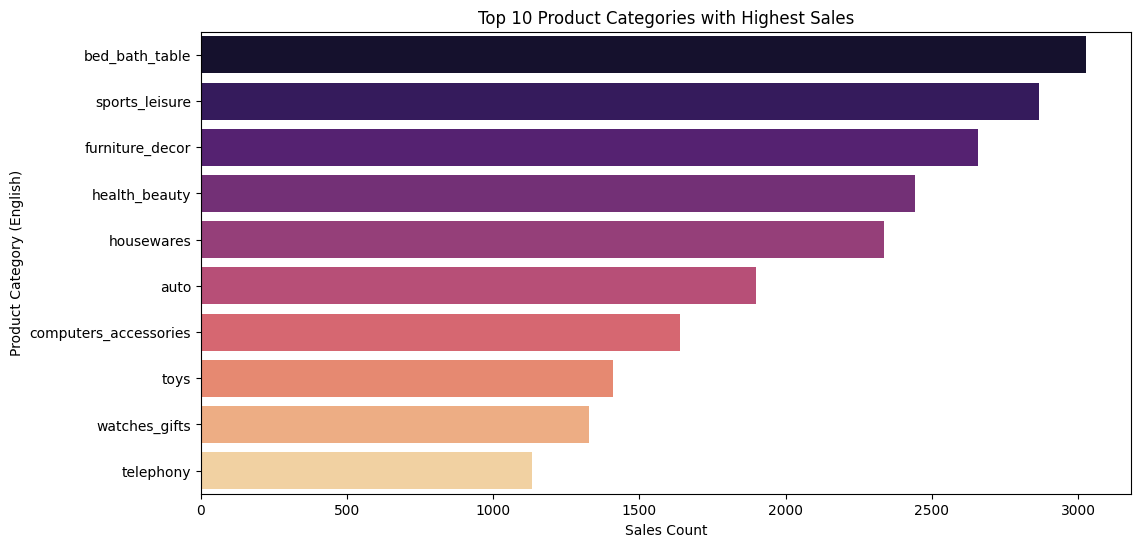

In [113]:
category_sales = products_eng['product_category_name_english'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales.values, y=category_sales.index, palette='magma')
plt.title("Top 10 Product Categories with Highest Sales")
plt.xlabel("Sales Count")
plt.ylabel("Product Category (English)")
plt.show()

**Insight:**

- Dominasi Kategori Produk:

Kategori **bed_bath_table** mencatat penjualan tertinggi dengan angka yang signifikan, menunjukkan bahwa konsumen memiliki minat besar terhadap produk-produk yang berkaitan dengan kenyamanan tidur dan mandi. Ini dapat menjadi fokus utama dalam strategi pemasaran.

- Variasi Kategori:

Kategori **health_beauty** dan **sports_leisure** juga menunjukkan angka penjualan yang kuat, yang menandakan semakin meningkatnya kesadaran akan kesehatan dan aktivitas luar ruangan di kalangan konsumen. Mungkin bermanfaat untuk mempertimbangkan pemasaran produk baru dalam kategori-kategori ini.

- Kebutuhan Fungsional:

Kategori **furniture_decor** dan **computers_accessories** juga memiliki penjualan yang baik, menunjukkan bahwa konsumen tidak hanya berfokus pada kebutuhan dasar tetapi juga pada estetika dan teknologi dalam kehidupan sehari-hari mereka.

- Kategori dengan Potensi Pertumbuhan:

Kategori **watches_gifts** dan **garden_tools** menunjukkan penjualan yang lebih rendah dibandingkan kategori lain. Namun, ini bisa jadi kesempatan untuk strategi peningkatan penjualan, misalnya dengan promosi atau pengenalan produk baru yang menarik bagi konsumen.

-  Konsistensi Permintaan:

Kategori **housewares** dan **telephony** menunjukkan penjualan yang stabil, menyiratkan bahwa barang-barang rumah tangga dan aksesori telekomunikasi adalah kebutuhan yang terus dicari oleh konsumen.

2. Kategori produk mana yang sangat kurang diminati pelanggan?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19080\2360179123.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_sales_bottom.values, y=category_sales_bottom.index, palette='coolwarm')


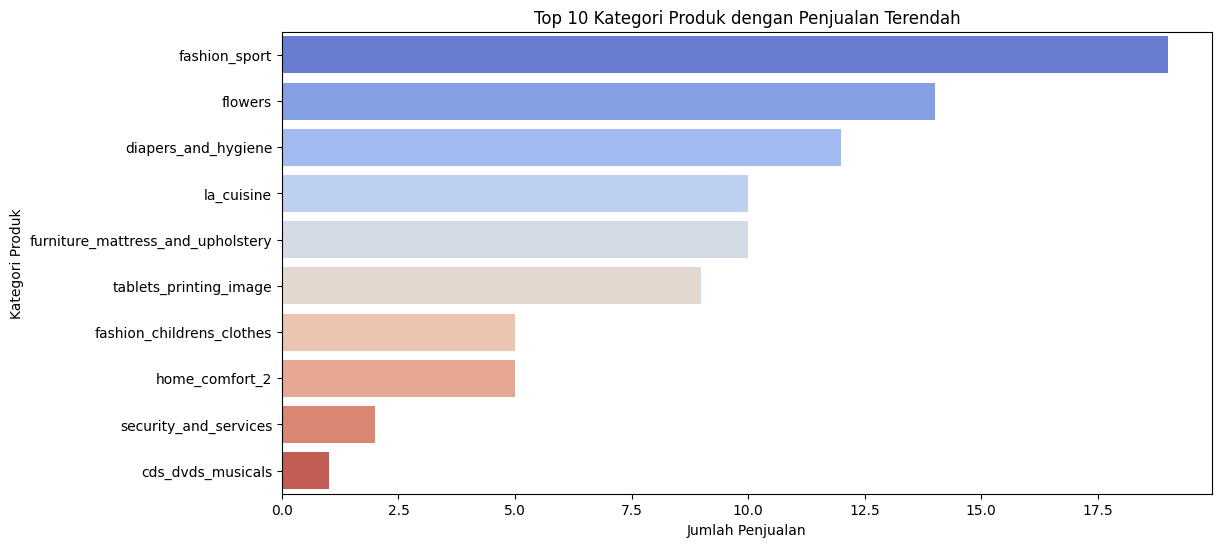

In [114]:

category_sales_bottom = products_eng['product_category_name_english'].value_counts().tail(10)  # Mengambil 10 kategori terendah

plt.figure(figsize=(12, 6))
sns.barplot(x=category_sales_bottom.values, y=category_sales_bottom.index, palette='coolwarm')
plt.title("Top 10 Kategori Produk dengan Penjualan Terendah")
plt.xlabel("Jumlah Penjualan")
plt.ylabel("Kategori Produk")
plt.show()

**Insight:**

- Kategorial Penjualan Terendah:

Kategori **security_and_services** memiliki jumlah penjualan terendah di antara kategori yang ditampilkan, menunjukkan bahwa konsumen mungkin kurang tertarik atau belum cukup memahami nilai tawaran dalam kategori ini.

- Tren dalam Kategori:

Kategori seperti **fashion_children_clothes** dan **la_cuisine** juga menunjukkan penjualan yang rendah, yang mungkin berarti ada peluang untuk memperbaiki pemasaran atau penawaran produk agar lebih relevan dengan kebutuhan dan keinginan konsumen.

- Kategori Hiburan:

Kategori **cds_dvds_musicals** dan **arts_and_craftsmanship** termasuk dalam kelompok dengan penjualan yang lebih rendah, yang bisa mencerminkan pergeseran dalam preferensi konsumen terhadap bentuk hiburan digital, seperti streaming.

- Potensi Peningkatan:

**furniture_mattress_and_upholstery** meskipun lebih baik dari kategori lain, tetap berada di atas rata-rata dalam grafik. Ini menunjukkan bahwa meskipun ada penjualan, ada ruang untuk pertimbangan lebih dalam pengembangan produk atau promosi untuk meningkatkan minat.

- Kondisi Pasar:

Kategori seperti **home_comfort_2** dan **flowers** meskipun penjualannya baik, menunjukkan bahwa ada beberapa potensi yang belum sepenuhnya dimanfaatkan dalam hal penjualan reguler, mungkin disebabkan oleh musiman atau tren yang sedang berlangsung.

3. Apakah deskripsi produk dan jumlah foto berpengaruh pada tingkat penjualan?

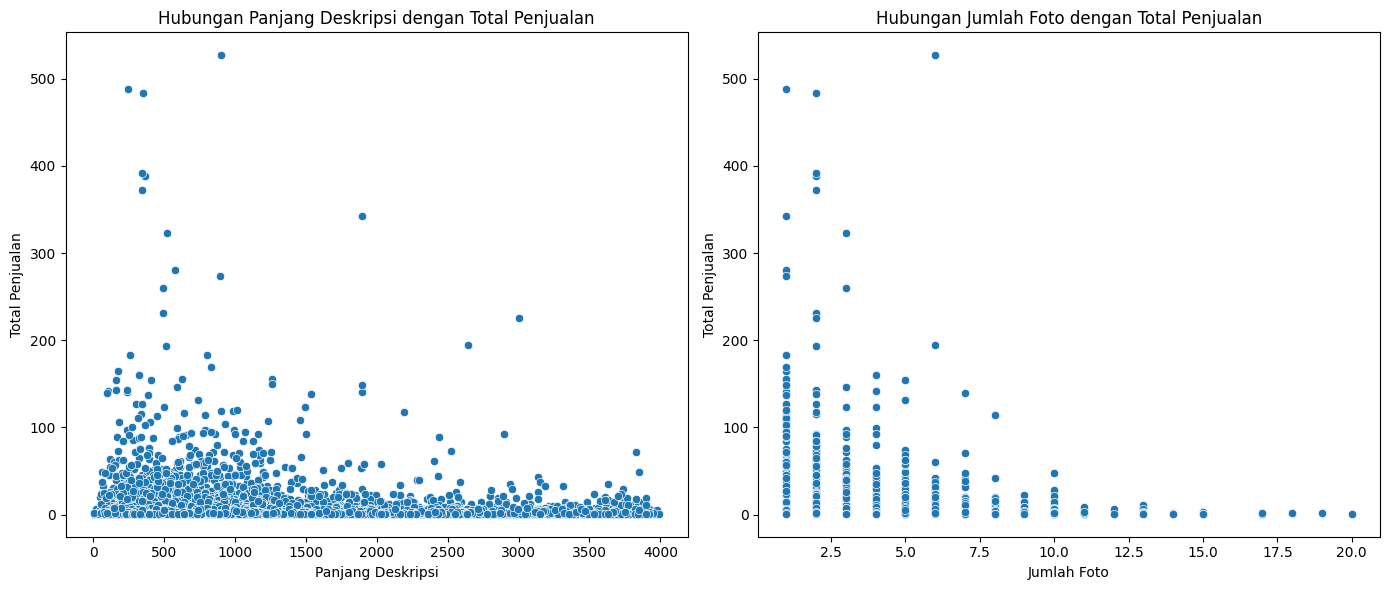

In [115]:
plt.figure(figsize=(14, 6))

# Scatter plot: Panjang deskripsi vs. Total penjualan
plt.subplot(1, 2, 1)
sns.scatterplot(data=product_sales_summary, x='product_description_lenght', y='total_sales')
plt.title('Hubungan Panjang Deskripsi dengan Total Penjualan')
plt.xlabel('Panjang Deskripsi')
plt.ylabel('Total Penjualan')

# Scatter plot: Jumlah foto vs. Total penjualan
plt.subplot(1, 2, 2)
sns.scatterplot(data=product_sales_summary, x='product_photos_qty', y='total_sales')
plt.title('Hubungan Jumlah Foto dengan Total Penjualan')
plt.xlabel('Jumlah Foto')
plt.ylabel('Total Penjualan')

plt.tight_layout()
plt.show()


**Insight:**

- Hubungan Panjang Deskripsi dengan Total Penjualan:

Plot di sebelah kiri menunjukkan distribusi panjang deskripsi produk terhadap total penjualan. Tidak terlihat adanya pola yang jelas antara panjang deskripsi dan tingkat penjualan.Panjang deskripsi yang lebih panjang tidak selalu berkorelasi dengan total penjualan yang lebih tinggi. Sebagian besar penjualan produk berada pada rentang panjang deskripsi yang rendah hingga sedang.

**Panjang deskripsi produk mungkin tidak memiliki pengaruh langsung terhadap penjualan. Fokus pada panjang deskripsi mungkin tidak menjadi prioritas utama dalam meningkatkan penjualan produk.**

- Hubungan Jumlah Foto dengan Total Penjualan:

Plot di sebelah kanan menunjukkan hubungan antara jumlah foto produk dengan total penjualan. Terlihat bahwa jumlah foto produk yang lebih banyak tidak berkorelasi dengan kenaikan penjualan secara konsisten. Sebagian besar penjualan terjadi pada produk dengan jumlah foto yang rendah hingga sedang (1–5 foto), sementara produk dengan jumlah foto yang lebih banyak tidak menunjukkan peningkatan signifikan dalam penjualan.

**Menambahkan lebih banyak foto mungkin tidak selalu meningkatkan penjualan secara signifikan. Hal ini menunjukkan bahwa faktor lain seperti kualitas foto atau informasi visual yang relevan mungkin lebih penting daripada kuantitas foto.**

4. Berapa banyak pesanan yang terlambat dari perkiraan waktu pengiriman?

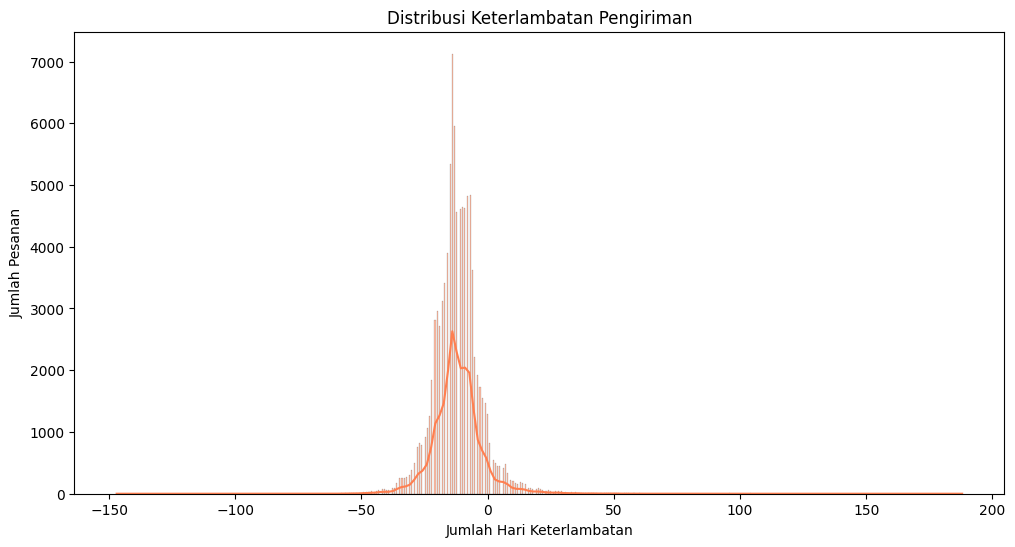

In [118]:
plt.figure(figsize=(12, 6))
sns.histplot(orders['delivery_delay'], kde=True, color='coral')
plt.title("Distribusi Keterlambatan Pengiriman")
plt.xlabel("Jumlah Hari Keterlambatan")
plt.ylabel("Jumlah Pesanan")
plt.show()


**Insight:**

Pada histogram ini, kita melihat distribusi jumlah hari keterlambatan pengiriman untuk berbagai pesanan. Sebagian besar pesanan berada di sekitar titik 0 hari keterlambatan, yang berarti pengiriman sebagian besar pesanan sesuai dengan waktu yang dijanjikan. Namun, terdapat beberapa pesanan yang mengalami keterlambatan signifikan, bahkan hingga lebih dari 50 hari. Demikian pula, terdapat beberapa pesanan yang dikirim lebih awal (dengan nilai negatif) hingga lebih dari 50 hari sebelum waktu yang diharapkan.
**Insight utama adalah bahwa walaupun banyak pengiriman tepat waktu atau lebih awal, masih ada beberapa kasus keterlambatan yang cukup ekstrem, yang dapat berdampak pada kepuasan pelanggan.**

5. Apakah ada hubungan antara keterlambatan pengiriman dengan review negatif?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19080\2872180025.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=orders_reviews, x='review_score', y='delivery_delay', palette='Set2')


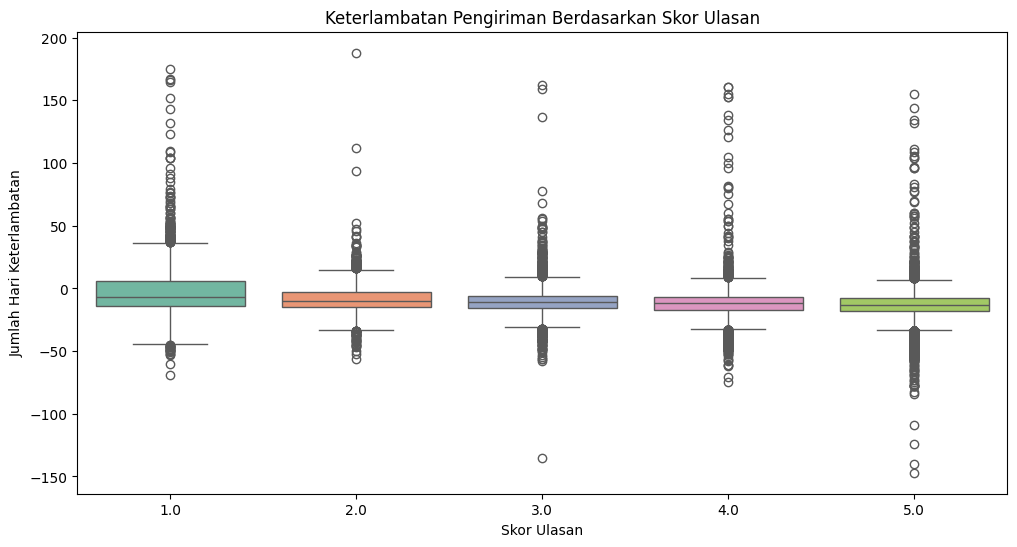

In [117]:
orders_reviews = orders.merge(order_reviews, on='order_id', how='left')
plt.figure(figsize=(12, 6))
sns.boxplot(data=orders_reviews, x='review_score', y='delivery_delay', palette='Set2')
plt.title("Keterlambatan Pengiriman Berdasarkan Skor Ulasan")
plt.xlabel("Skor Ulasan")
plt.ylabel("Jumlah Hari Keterlambatan")
plt.show()

**Insight:**

  Pada box plot ini, kita bisa melihat hubungan antara jumlah hari keterlambatan dan skor ulasan yang diberikan oleh pelanggan.
Secara umum, tidak ada perubahan besar dalam median keterlambatan pengiriman di setiap kelompok skor ulasan (1 hingga 5). Ini menunjukkan bahwa keterlambatan pengiriman mungkin tidak selalu berhubungan langsung dengan skor ulasan yang diberikan.
Namun, ada beberapa outlier di setiap kelompok skor, terutama pada skor rendah (1 dan 2), yang menunjukkan bahwa pesanan yang mengalami keterlambatan lebih dari 50 hari lebih sering dikaitkan dengan ulasan yang lebih rendah.
**Hal ini dapat dikatakan bahwa pengiriman tepat waktu mungkin tidak cukup untuk mendapatkan skor ulasan tinggi. Mungkin ada faktor lain seperti kualitas produk atau layanan yang mempengaruhi skor ulasan pelanggan.**

6. Metode pembayaran mana yang paling sering digunakan pelanggan?

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19080\3591984336.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=order_payments, x='payment_type', palette='coolwarm', order=order_payments['payment_type'].value_counts().index)


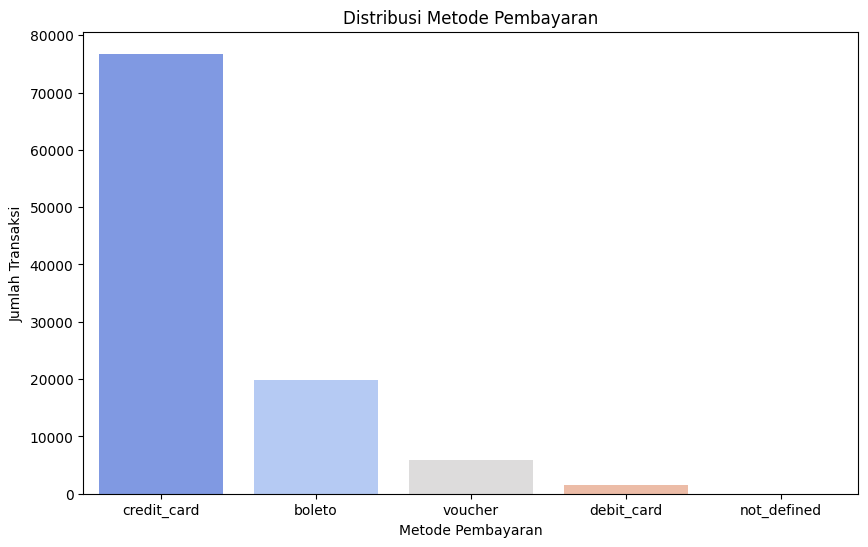

In [119]:
# Bar plot metode pembayaran
plt.figure(figsize=(10, 6))
sns.countplot(data=order_payments, x='payment_type', palette='coolwarm', order=order_payments['payment_type'].value_counts().index)
plt.title("Distribusi Metode Pembayaran")
plt.xlabel("Metode Pembayaran")
plt.ylabel("Jumlah Transaksi")
plt.show()


**Insight:**

Penggunaan metode pembayaran lebih didominasi oleh **credit card**, dengan jumlah transaksi jauh lebih tinggi dibandingkan metode lainnya seperti boleto dan voucher. **Hal ini menunjukkan preferensi konsumen terhadap pembayaran yang cepat dan mudah, yang mungkin juga berkaitan dengan kecepatan proses transaksi.**
  

7. Apakah penggunaan metode pembayaran kredit atau cicilan memengaruhi nilai transaksi?

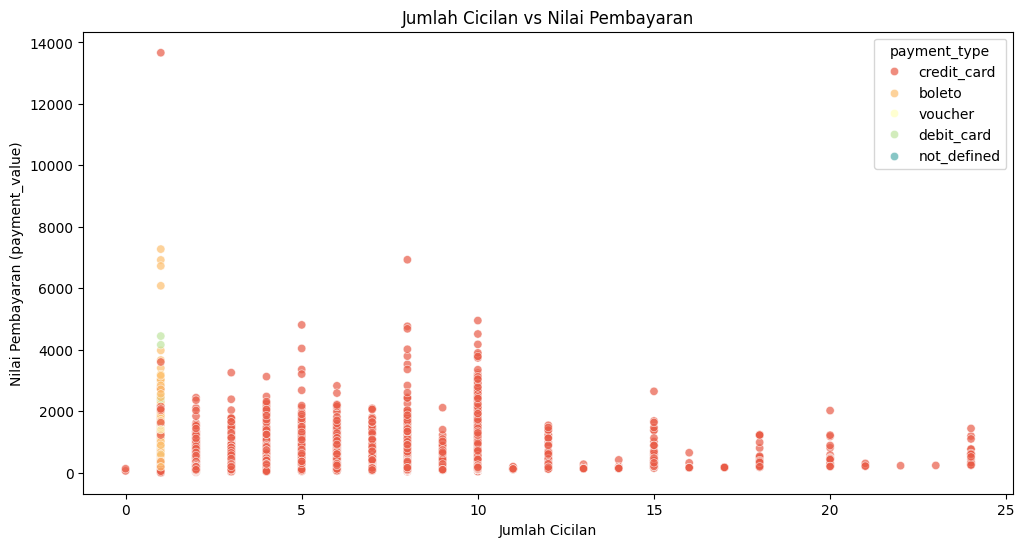

In [120]:

# Scatter plot cicilan vs nilai pembayaran
plt.figure(figsize=(12, 6))
sns.scatterplot(data=order_payments, x='payment_installments', y='payment_value', hue='payment_type', palette='Spectral', alpha=0.7)
plt.title("Jumlah Cicilan vs Nilai Pembayaran")
plt.xlabel("Jumlah Cicilan")
plt.ylabel("Nilai Pembayaran (payment_value)")
plt.show()

**Insight:**

Terdapat variabilitas yang tinggi pada nilai pembayaran dengan jumlah cicilan yang berbeda. Catatan pembayarannya menunjukkan bahwa meskipun ada beberapa nilai tinggi, sebagian besar nilai pembayaran terdistribusi pada jumlah cicilan rendah. **Ini bisa menunjukkan bahwa banyak konsumen memilih cicilan dengan nilai pembayaran yang lebih rendah.**

8.  Bagaimana distribusi skor ulasan?

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=order_reviews, x='review_score', palette='plasma')
plt.title("Distribusi Skor Ulasan Pelanggan")
plt.xlabel("Skor Ulasan")
plt.ylabel("Jumlah Ulasan")
plt.show()

**Insight:**

Skor ulasan pelanggan menunjukkan kecenderungan positif, dengan jumlah ulasan paling banyak di skor 5, diikuti oleh 4. **Ini menandakan kepuasan yang tinggi di antara pelanggan, di mana sebagian besar merasa puas dengan produk atau layanan yang diberikan.**

9. Apakah harga produk dan biaya pengiriman memengaruhi keputusan pembelian pelanggan?

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=order_items.merge(products, on='product_id'), x='price', y='freight_value', alpha=0.7)
plt.title("Harga Produk vs Biaya Pengiriman")
plt.xlabel("Harga Produk")
plt.ylabel("Biaya Pengiriman")
plt.show()

**Insight:**

**Terdapat kecenderungan bahwa produk dengan harga yang lebih rendah juga memiliki biaya pengiriman yang lebih rendah.** Namun, ada beberapa titik data dengan biaya pengiriman yang tinggi untuk produk berharga rendah, yang mungkin menarik perhatian untuk analisis lebih lanjut terkait biaya pengiriman.

10. Apakah terdapat pola pembelian khusus di wilayah tertentu yang dapat memengaruhi strategi pemasaran regional?

In [ ]:
# Bar plot distribusi pelanggan berdasarkan negara bagian
plt.figure(figsize=(12, 6))
sns.countplot(data=customers, y='customer_state', order=customers['customer_state'].value_counts().index, palette='viridis')
plt.title("Distribusi Pelanggan Berdasarkan Negara Bagian")
plt.xlabel("Jumlah Pelanggan")
plt.ylabel("Negara Bagian")
plt.show()

**Insight:**

State **SP** dan **RJ** memiliki jumlah pelanggan yang jauh lebih banyak dibandingkan dengan lainnya. **Hal ini mungkin karena kepadatan penduduk atau tingkat urbanisasi yang lebih tinggi di wilayah tersebut, menunjukkan potensi pasar yang lebih besar.**

11. Bagaimana tren penjualan dari waktu ke waktu?

In [ ]:

# Menghitung jumlah penjualan bulanan
monthly_sales = orders.groupby('year_month').size()

# Visualisasi trend penjualan bulanan
plt.figure(figsize=(14, 6))
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Trend Penjualan Bulanan")
plt.xlabel("Tahun-Bulan")
plt.ylabel("Jumlah Penjualan")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


**Insight:**

- Pertumbuhan Penjualan yang Stabil:

Terdapat tren pertumbuhan yang stabil dari bulan Oktober 2017 hingga Juni 2018, di mana jumlah penjualan menunjukkan peningkatan yang konsisten. **Ini menunjukkan bahwa produk atau layanan yang ditawarkan semakin diterima oleh pasar.**

- Puncak Penjualan:

Penjualan mencapai puncaknya pada sekitar bulan Juni 2018, dengan jumlah penjualan tertinggi mendekati 6.000 unit. **Ini mungkin bertepatan dengan strategi pemasaran tertentu, peluncuran produk baru, atau kampanye promosi yang efektif.**

- Penurunan Pasca-Puncak:

Setelah mencapai puncak, terlihat adanya penurunan signifikan dalam penjualan yang terjadi sekitar Juli 2018. **Penurunan ini bisa disebabkan oleh beberapa faktor, seperti berakhirnya kampanye promosi, musiman, atau meningkatnya persaingan di pasar.**

- Fluktuasi yang Konsisten:

Setelah penurunan, penjualan tampak lebih fluktuatif dengan sejumlah kenaikan dan penurunan yang kurang signifikan, mencerminkan ketidakstabilan yang mungkin terkait dengan perubahan permintaan konsumen atau kondisi pasar.

- Kondisi Bulan Terakhir:

Pada Oktober 2018, terjadi penurunan tajam dalam penjualan. **Ini mungkin menunjukkan adanya masalah yang mempengaruhi permintaan, seperti pergeseran preferensi konsumen, masalah dalam distribusi, atau faktor eksternal seperti kondisi ekonomi.**

- Pola Musiman yang Terlihat:

Kenaikan penjualan yang terlihat menjelang puncak pada Juni 2018 mungkin menunjukkan adanya musim tertentu yang meningkatkan minat konsumen, seperti liburan atau acara khusus yang mendorong orang untuk membeli lebih banyak produk.